In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree


In [2]:
#reading the dataset file using pandas
Data = pd.read_csv('Clean_Dataset.csv')

In [3]:
Data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
Data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
Data.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [6]:
Data.duplicated().sum()

0

In [7]:
Data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
Data=Data.drop('Unnamed: 0',axis=1)

In [12]:
Data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

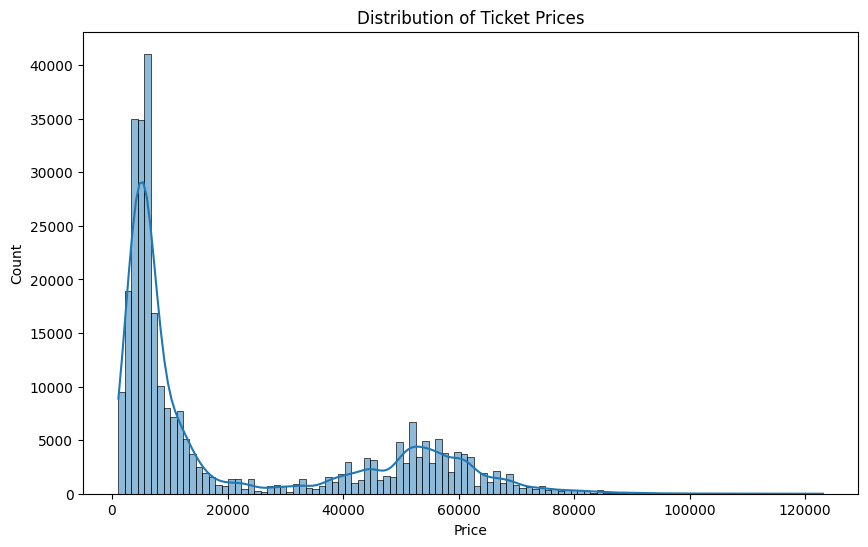

In [13]:
#Histogram representing distribution of ticket prices
plt.figure(figsize=(10, 6))
sns.histplot(data=Data, x='price', kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

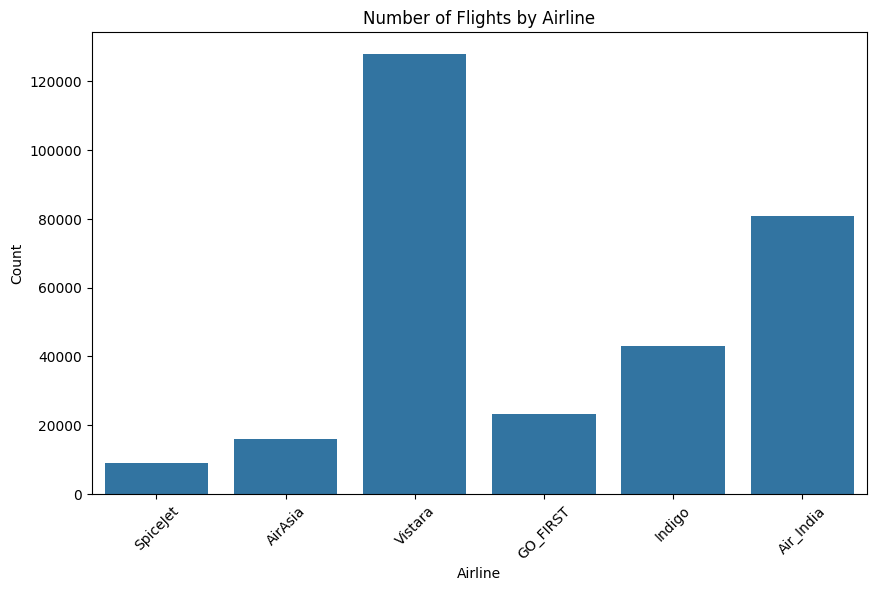

In [14]:
#Bar chart of number of flights by airlines
plt.figure(figsize=(10, 6))
sns.countplot(data=Data, x='airline')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

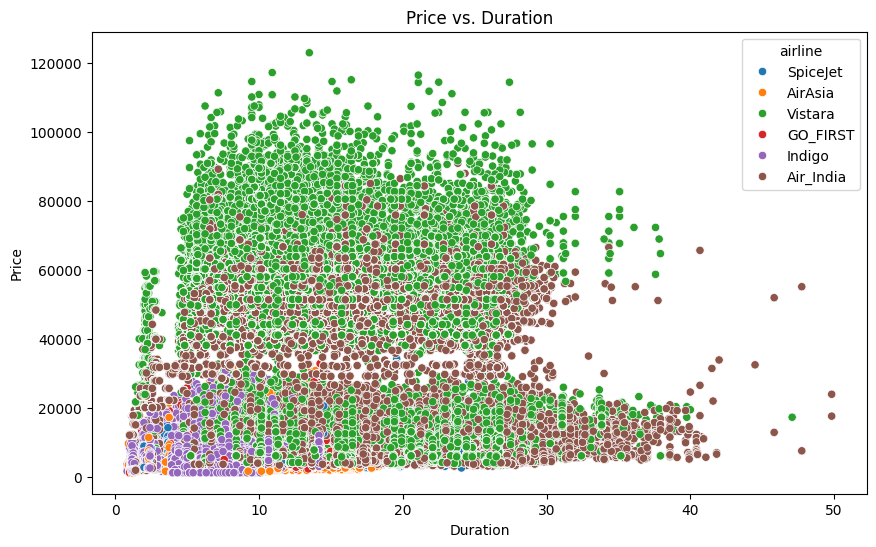

In [15]:
# Scatter plot of price versus duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='duration', y='price', hue='airline')
plt.title('Price vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

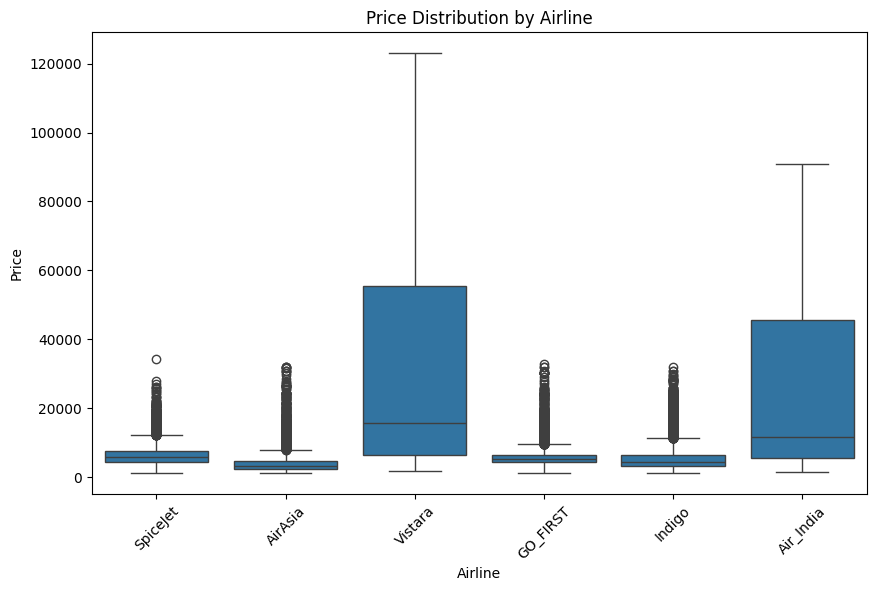

In [16]:
#Box plot of price by airline
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='airline', y='price')
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [17]:
#FUNCTION FOR PLOTTING - 
def price_and(x):
    z = Data.groupby(x)['price'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(data = z, x= x,y='price')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

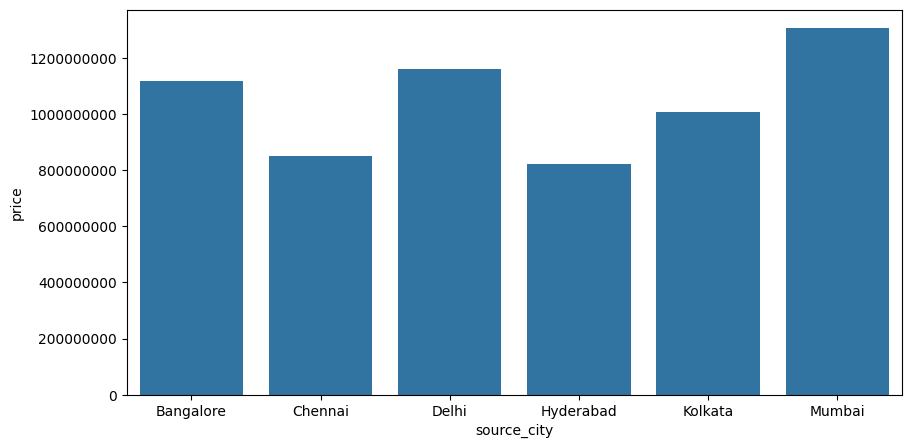

In [18]:
price_and('source_city')

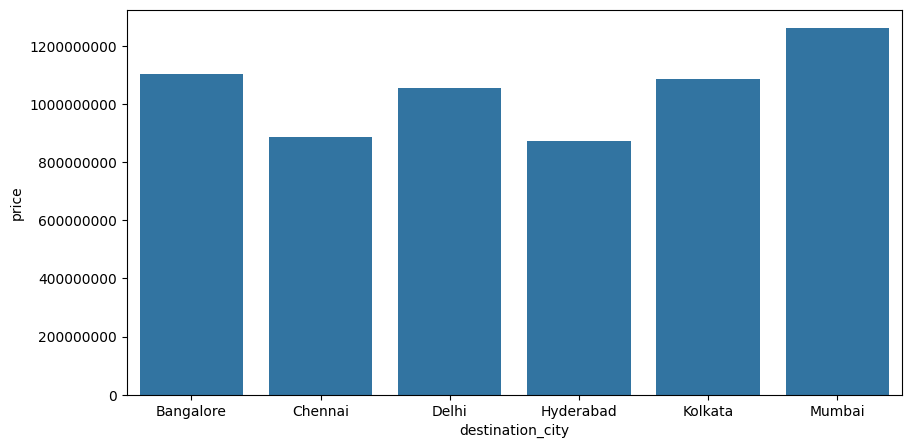

In [19]:
price_and('destination_city')

Departure city counts from more to less:
 source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


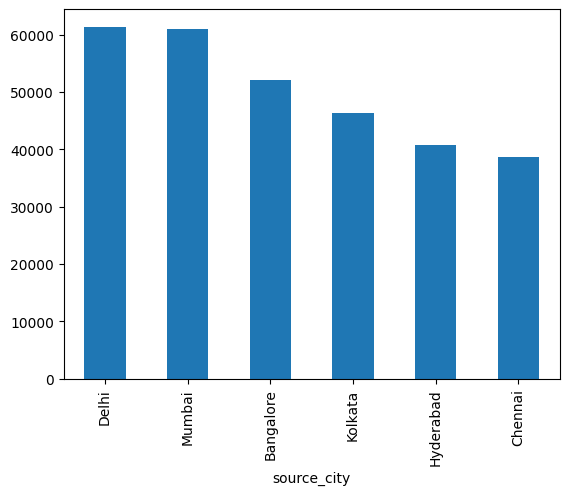

In [20]:
# Count the occurrences of source cities
source_city_counts = Data['source_city'].value_counts()
print("Departure city counts from more to less:\n", source_city_counts)
source_city_counts.plot(kind='bar');

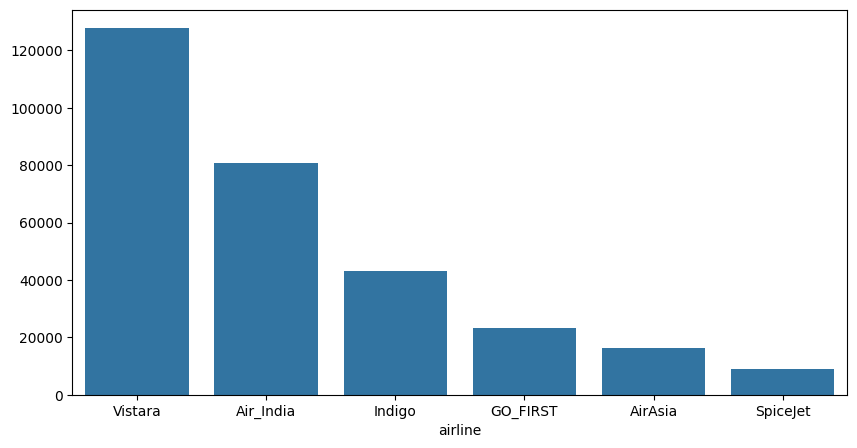

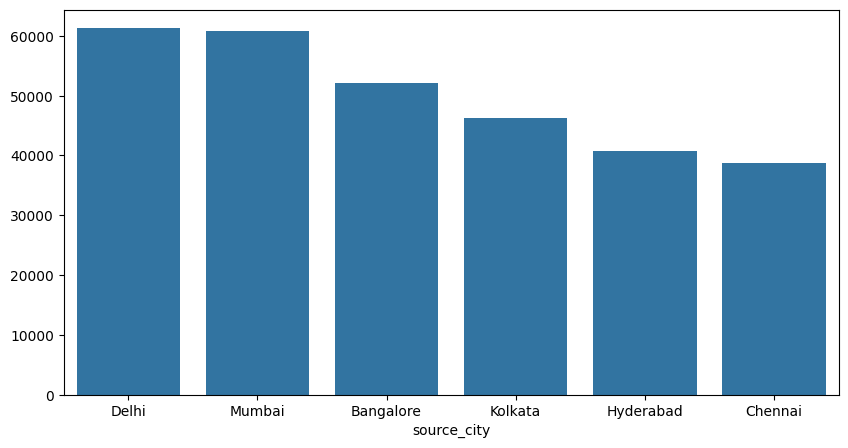

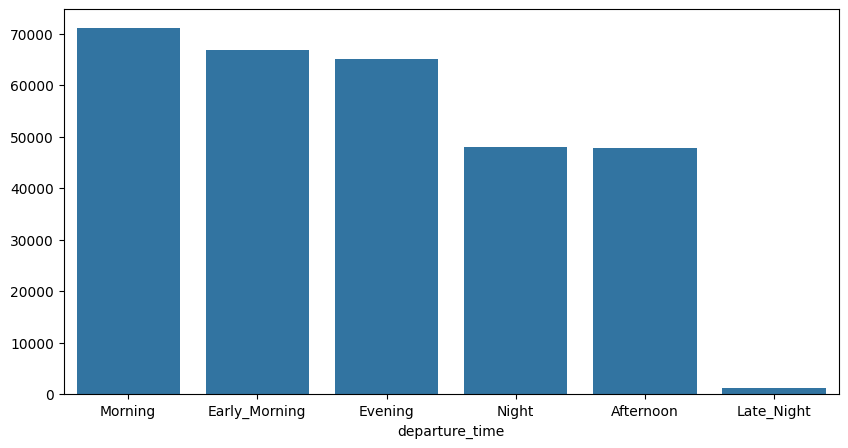

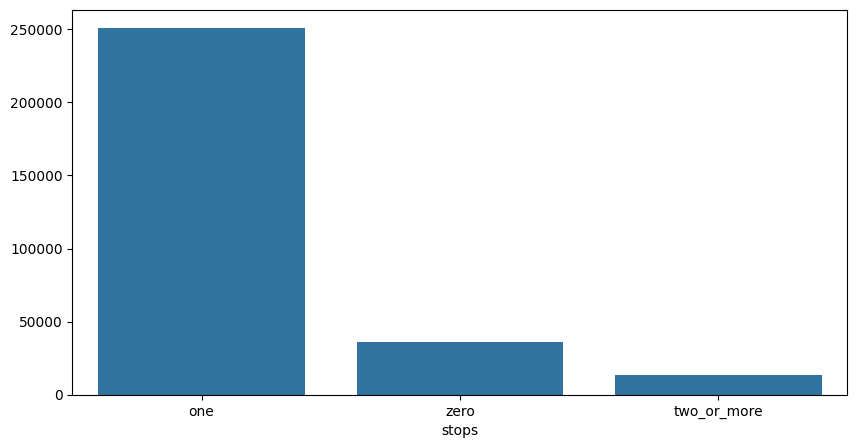

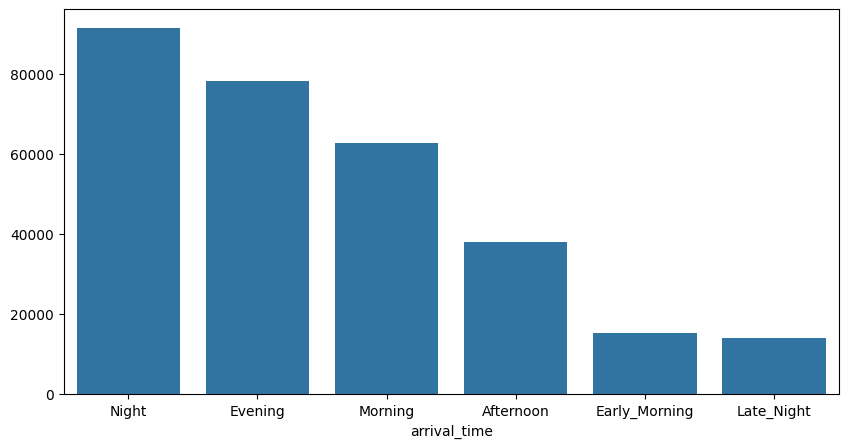

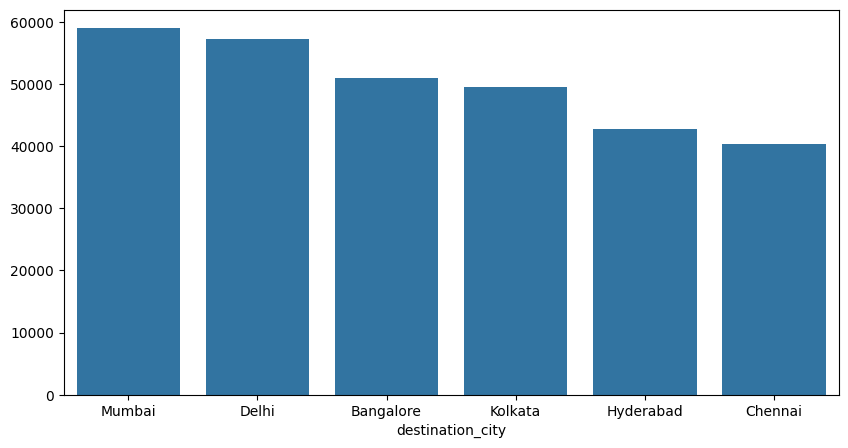

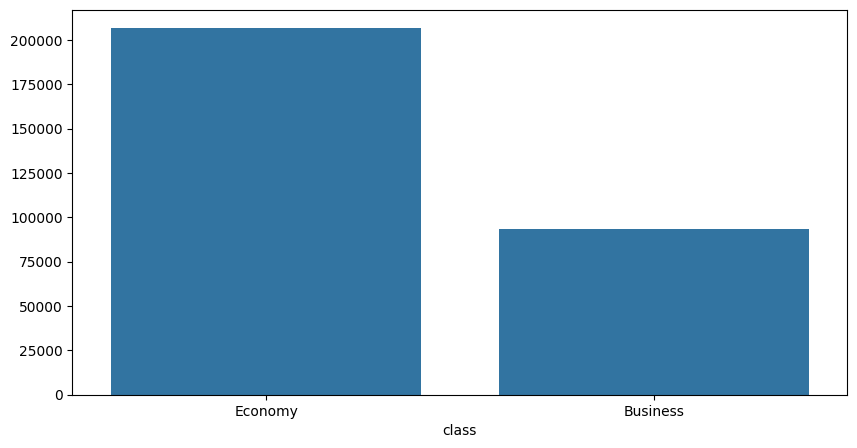

In [21]:
cat = ['airline','source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class']

#VISUALIZING THE VALUE COUNTS
for i in cat:
    count_data = Data[i].value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=count_data.index, y=count_data.values)
    plt.show()

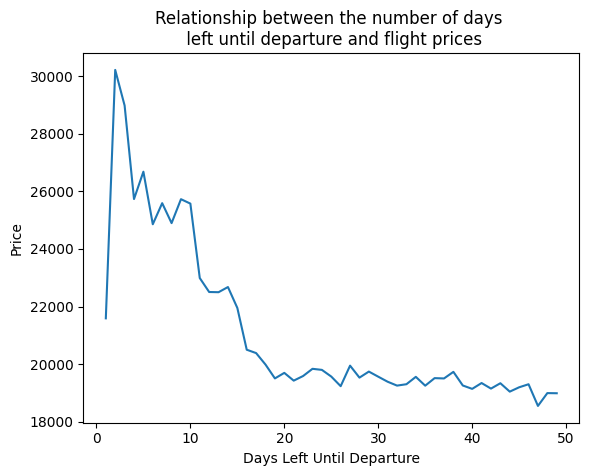

In [22]:
# Create a plot of days_left vs. price
Data.groupby('days_left')['price'].mean().plot()
plt.xlabel('Days Left Until Departure')
plt.ylabel('Price')
plt.title('Relationship between the number of days \n left until departure and flight prices')
plt.show()

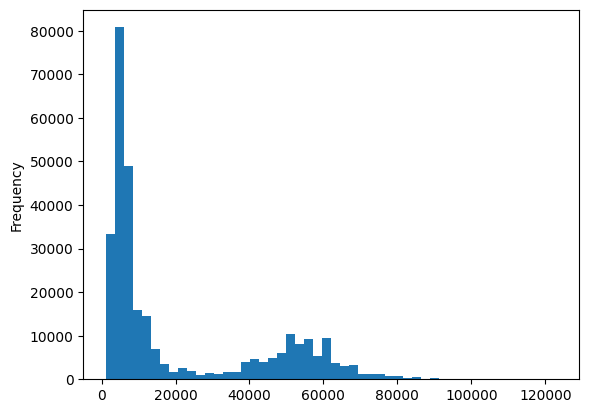

In [23]:
Data["price"].plot.hist(bins=50);

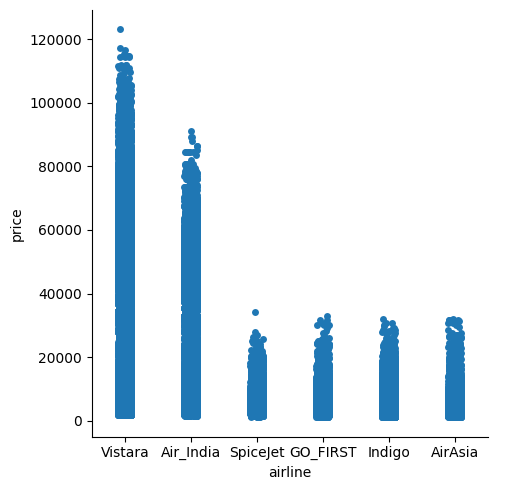

In [24]:
sns.catplot(y='price', x='airline', data=Data.sort_values('price', ascending=False, kind='quick'))
plt.show()

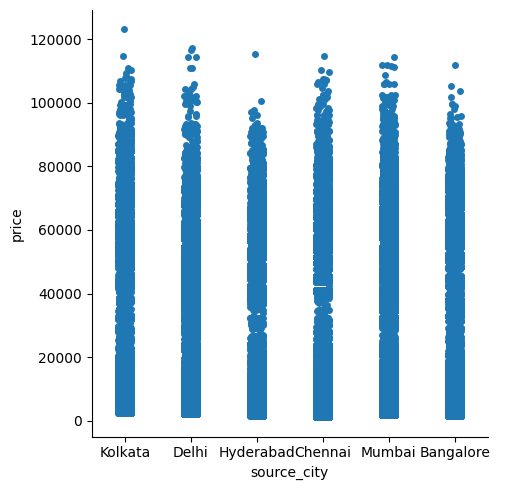

In [25]:
sns.catplot(y='price', x='source_city', data=Data.sort_values('price', ascending=False, kind='quick'))
plt.show()

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
columns_to_encode = [
    'class', 'destination_city', 'arrival_time', 'stops', 
    'departure_time', 'source_city', 'flight', 'airline'
]

# Initialize the LabelEncoder
label_encoders = {}

# Encode each column
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()  # Save the encoder for potential inverse transformations
    Data[col] = label_encoders[col].fit_transform(Data[col])

# Display the transformed DataFrame
print(Data.head())


   airline  flight  source_city  departure_time  stops  arrival_time  \
0        4    1408            2               2      2             5   
1        4    1387            2               1      2             4   
2        0    1213            2               1      2             1   
3        5    1559            2               4      2             0   
4        5    1549            2               4      2             4   

   destination_city  class  duration  days_left  price  
0                 5      1      2.17          1   5953  
1                 5      1      2.33          1   5953  
2                 5      1      2.17          1   5956  
3                 5      1      2.25          1   5955  
4                 5      1      2.33          1   5955  


In [31]:
#FEATURE SELECTION
Data = Data.drop('flight', axis=1)

In [32]:
Data.to_csv('Indian_Airlines_cleaned_data.csv',index=False)

Data= pd.read_csv('Indian_Airlines_cleaned_data.csv')
Data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [50]:
from sklearn.model_selection import train_test_split

# Assume df is your DataFrame
# Define feature set and target label
X = Data.drop(columns=['price'])
y = Data['price']


# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Optionally, print the shapes of the resulting splits
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240122, 9)
y_train shape:  (240122,)
X_test shape:  (60031, 9)
y_test shape:  (60031,)


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 150 ,max_depth = 30, min_samples_leaf = 5, min_samples_split = 30)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=30,
                      n_estimators=150)

In [63]:
y_pred = rf.predict(X_test) 

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)



Mean Absolute Error (MAE): 1280.310989805577
Mean Squared Error (MSE): 7687954.678732624
Root Mean Squared Error (RMSE): 2772.7161193913494
R² Score: 0.9850858990251865


In [55]:
import pickle 

In [56]:
# save the model
model = rf  # Your machine learning model object
file_path = 'rf-cyber.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)

In [57]:
import pickle
# load the model

file_path = 'rf-cyber.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [46]:
X_train.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left'],
      dtype='object')

In [65]:
loaded_model.predict([[3,2,4,2,0,5,1,2.17,1]])

array([7630.31220868])